In [2]:
import networkx as nx

In [3]:
G = nx.Graph()

In [4]:
G.add_edges_from([
    (0, 1, {"weight": 7}),
    (0, 2, {"weight": 2}),
    (0, 3, {"weight": 10}),
    (0, 4, {"weight": 1}),
    (1, 2, {"weight": 8}),
    (1, 3, {"weight": 4}),
    (1, 4, {"weight": 5}),
    (2, 3, {"weight": 11}),
    (2, 4, {"weight": 3}),
    (3, 4, {"weight": 6}),
])

In [5]:
print(G.nodes)
print(G.edges)


[0, 1, 2, 3, 4]
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


{(0, 1): Text(0.654508476093664, 0.47552828417802706, '7'),
 (0, 2): Text(0.09549147175227024, 0.2938926307527015, '2'),
 (0, 3): Text(0.09549150155459352, -0.2938926605550248, '10'),
 (0, 4): Text(0.6545085505994722, -0.4755282543757038, '1'),
 (1, 2): Text(-0.25000005215406573, 0.7694209149307285, '8'),
 (1, 3): Text(-0.25000002235174246, 0.18163562362300228, '4'),
 (1, 4): Text(0.3090170266931363, 2.980232327587373e-08, '5'),
 (2, 3): Text(-0.8090170266931362, -2.980232327587373e-08, '11'),
 (2, 4): Text(-0.24999997764825752, -0.18163562362300228, '3'),
 (3, 4): Text(-0.24999994784593424, -0.7694209149307285, '6')}

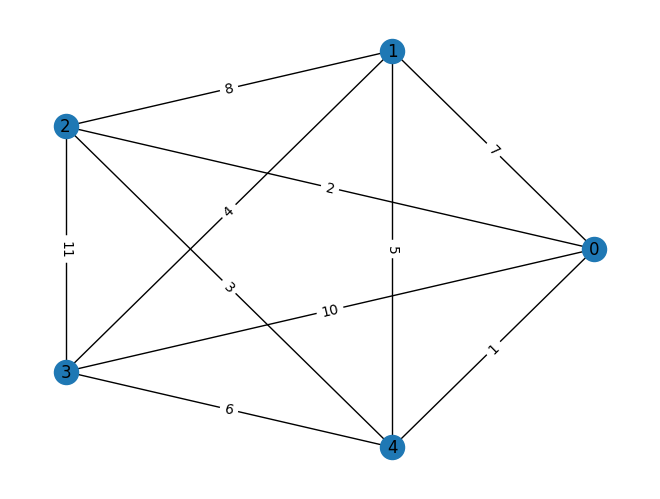

In [7]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [8]:
class GreedyHamiltonianPathPlanner:
    def __init__(self, graph: nx.Graph, starting_node: int = 0):
        self.graph = graph
        self.starting_node = starting_node
    def find_path(self):
        unvisited = set(self.graph.nodes)

        # the start node is already visited
        current_node = self.starting_node
        unvisited.remove(current_node)
        path = [current_node]
        path_length = 0

        while unvisited:
            next_node = min(unvisited, key=
                lambda node: self.graph[current_node][node]["weight"])

            path_length += self.graph[current_node][next_node]["weight"]
            current_node = next_node
            unvisited.remove(current_node)
            path.append(current_node)

        return path, path_length

In [10]:
greedy_planner = GreedyHamiltonianPathPlanner(G)
path, path_length = greedy_planner.find_path()
print(path)
print(path_length)

[0, 4, 2, 1, 3]
16


In [ ]:
class GreedyHamiltonianPathPlanner:
    def __init__(self, graph: nx.Graph, starting_node: int = 0):
        self.graph = graph
        self.starting_node = starting_node
    def find_path(self):
        unvisited = set(self.graph.nodes)

        # the start node is already visited
        current_node = self.starting_node
        unvisited.remove(current_node)
        path = [current_node]
        path_length = 0

        while unvisited:
            next_node = min(unvisited, key=
                lambda node: self.graph[current_node][node]["weight"])

            path_length += self.graph[current_node][next_node]["weight"]
            current_node = next_node
            unvisited.remove(current_node)
            path.append(current_node)

        return path, path_length

In [15]:
current_node = 0
G[current_node]

AtlasView({1: {'weight': 7}, 2: {'weight': 2}, 3: {'weight': 10}, 4: {'weight': 1}})

In [23]:
x = G.neighbors(0)

In [131]:
import itertools
import numpy as np
starting_node = 0
num_nodes = len(G.nodes)
other_nodes = list(G.adj[starting_node])
path_length_dist = 0
shortest_length = np.infty
shortest_path = ()

for path in itertools.permutations(other_nodes):
    path_length = sum(
        (G[path[i]][path[i+1]]["weight"] for i in range(num_nodes - 2)),
        start = G[starting_node][path[0]]["weight"])
    if path_length < shortest_length:
        shortest_path = path
        shortest_length = path_length
print(shortest_path)
print(shortest_length)

(2, 4, 1, 3)
14


In [119]:
class ExhaustiveHamiltonianPathPlanner:
    def __init__(self, graph: nx.Graph, starting_node: int = 0):
        self.graph = graph
        self.starting_node = starting_node
    def find_path(self):
        num_nodes = len(G.nodes)
        other_nodes = list(G.adj[self.starting_node])
        shortest_length = np.infty
        shortest_path = ()

        for path in itertools.permutations(other_nodes):
            path_length = sum(
                (G[path[i]][path[i+1]]["weight"] for i in range(num_nodes - 2)),
                start = G[self.starting_node][path[0]]["weight"])
            if path_length < shortest_length:
                shortest_path = path
                shortest_length = path_length
        shortest_path = [self.starting_node] + list(shortest_path)
        return shortest_path, shortest_length

In [142]:
exhaustive_planner = ExhaustiveHamiltonianPathPlanner(G)
path, path_length = exhaustive_planner.find_path()
print(path)
print(path_length)

[0, 2, 4, 1, 3]
14


In [143]:
import time
t0 = time.time()
for i in range(1000):
    exhaustive_planner = ExhaustiveHamiltonianPathPlanner(G)
    path, path_length = exhaustive_planner.find_path()
t1 = time.time()
print(t1-t0)

0.09184956550598145
